# Выработка стратегии взаимодействия с клиентами на основе аналитических данных

## Описание проекта

**Заказчик:**
Сеть фитнес-центров «Культурист-датасаентист»

**ЗАДАЧА**
На основе аналитических данных подготовить план действий по удержанию клиентов, а именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов(выделить несколько наиболее ярких групп и охарактеризовать их основные свойства)
- проанализировать основные признаки, наиболее сильно влияющие на отток
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами (выделить целевые группы клиентов, предложить меры по снижению оттока, определить другие особенности взаимодействия с клиентами).

**Данные**

Заказчик подготовил csv_таблицу, которая содержит данные на месяц до оттока и факт оттока на определённый месяц.

**Набор данных включает следующие поля:**

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон
- 'Churn' — факт оттока в текущем месяце. 


## Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('D:/учеба/портфолио/roots/ml.csv')

In [3]:
# обзорно просматриваем данные
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# посчитаем дубликаты
data.duplicated().sum()

0

In [6]:
# приведем названия столбцов к нижнему регистру
data.columns = [c.lower() for c in data]
data.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

**В данных 14 столбцов и 4000 строк. Пропусков нет, дубликатов нет. Все даннные представлены в числовом формате (целые и вещественные числа).**

## Исследовательский анализ данных

In [7]:
# посмотрим на числовые данные по столбцам
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Описание данных показало нам следующее:

**общие данные**
- 7 столбцов с бинарными значениями, в том числе наша целевая переменная churn
- столбец contract_period с тремя значениями (1,6,12)
- остальные данные с широким набором значений

**портрет клиента**

- ушедших клиентов много меньше остающихся
- мужчин и женщин примерно поровну
- возраст клиентов от 18 до 41 года
- лайфтайм от 0 (купили абонемент и скорее всего так и "не дошли") до 31 месяца
- больше тех клиентов, что живут/работают возле фитнесс-центра
- почти половина клиентов приходят от предприятий-партнеров
- практически все оставляют свой контактный телефон
- траты на сопутствующие услуги неровные (судя по std), кто-то готов потратиться, кто-то - нет

In [8]:
# посмотрим на средние значения для ушедших/оставшихся клиентов
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Опишем те данные, которые показали заметные различия средних значений в группах:
- клиенты от предприятий-партнеров уходят реже
- у остающихся длиннее срок абонемента (деньги отданы, нужно их "окупить")
- остающиеся старше, средний возраст почти 30 лет (уходящие - средний возраст пости 27 лет)
- у тех кто ушел в среднем оставалось 1.6 месяца до конца абонемента
- у остающихся средний лайфтайм 4.7 месяца, средний лайфтайм уходящих 0.99
- остающиеся больше тратят на дополнительные услуги

Далее посмотрим на визуализацию распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) и дополним выводы.

In [9]:
# разделим столбцы, чтобы применить разные типы графиков для колонок с бинарным и небинарным набором значений
bi = ['churn', 'gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
multi = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


In [10]:
# зададим палитру для всех графиков
sns.set_palette('dark')

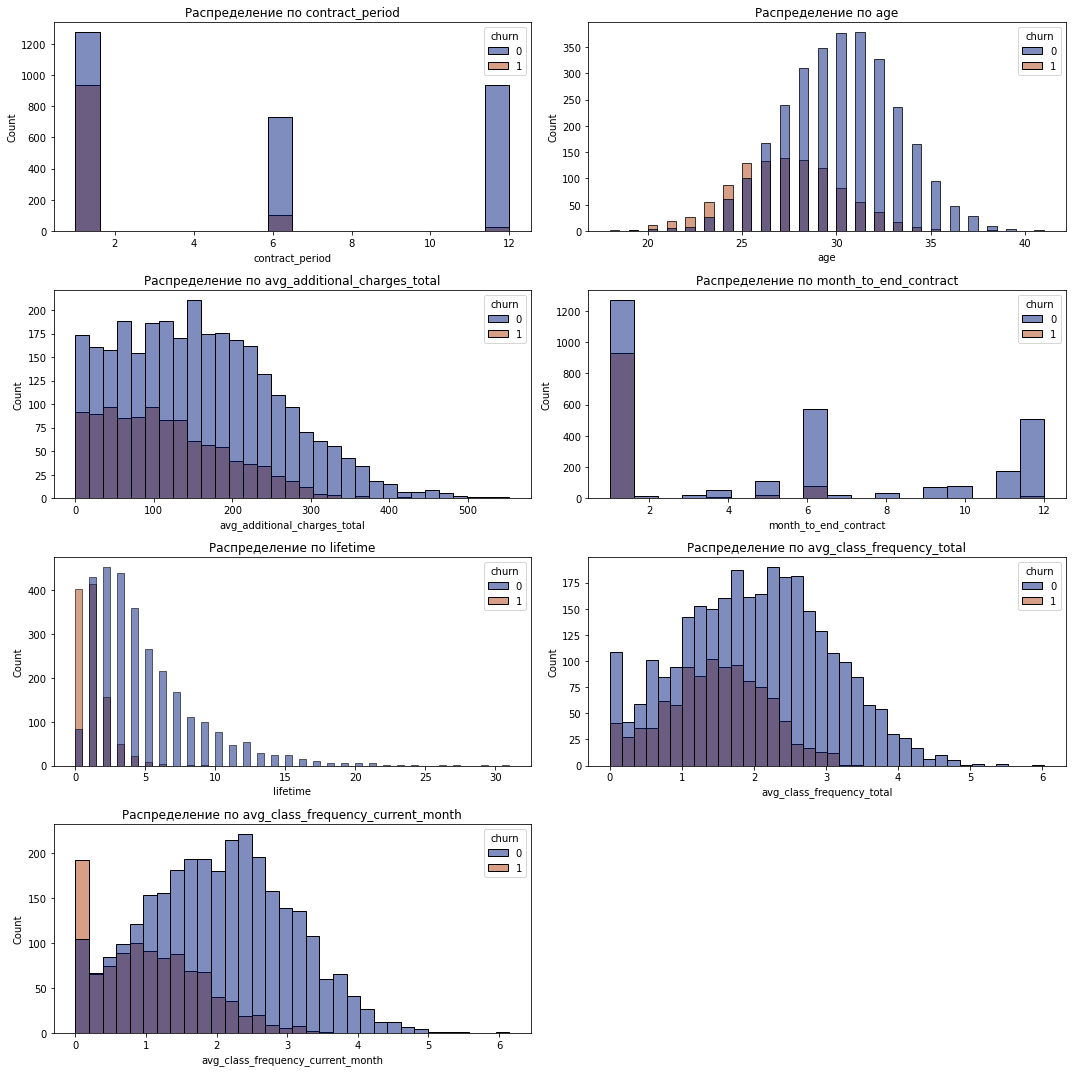

In [39]:
#построим графики распредления


number_row = int(len(multi)/2)
fig, ax = plt.subplots(nrows = number_row + 1, ncols=2, figsize=(15, 15))
ax = ax.flatten()

# задаем цикл

for i in range(len(multi)):
    

    sns.histplot(data = data, x = multi[i], hue = 'churn', ax=ax[i]) 

    ax[i].set_title(f'Распределение по {multi[i]}')
    ax[i].set_xlabel(f'{multi[i]}')


# удалим последний пустой  
fig.delaxes(ax[-1])

            
# чтобы все надписи вошли   
fig.tight_layout()

plt.show()


**Дополним выводы:**
- данные по возрасту и лайфтайму распределены нормально
- среднее количество визитов за предыдущий месяц и за все время действия абонемента имеют характерную особенность: высокая частота в начале, потом спад и переход к практически нормальному распределению
- распределения по остающимся и ушедшим показывают, что остающиеся тратят бОльшие суммы. Характер распределения показывает, что маленькие и средние суммы (размер их в каждой категории свой) тратятся сразу же большим количеством клиентов (высокая и пологая левая часть распределения).

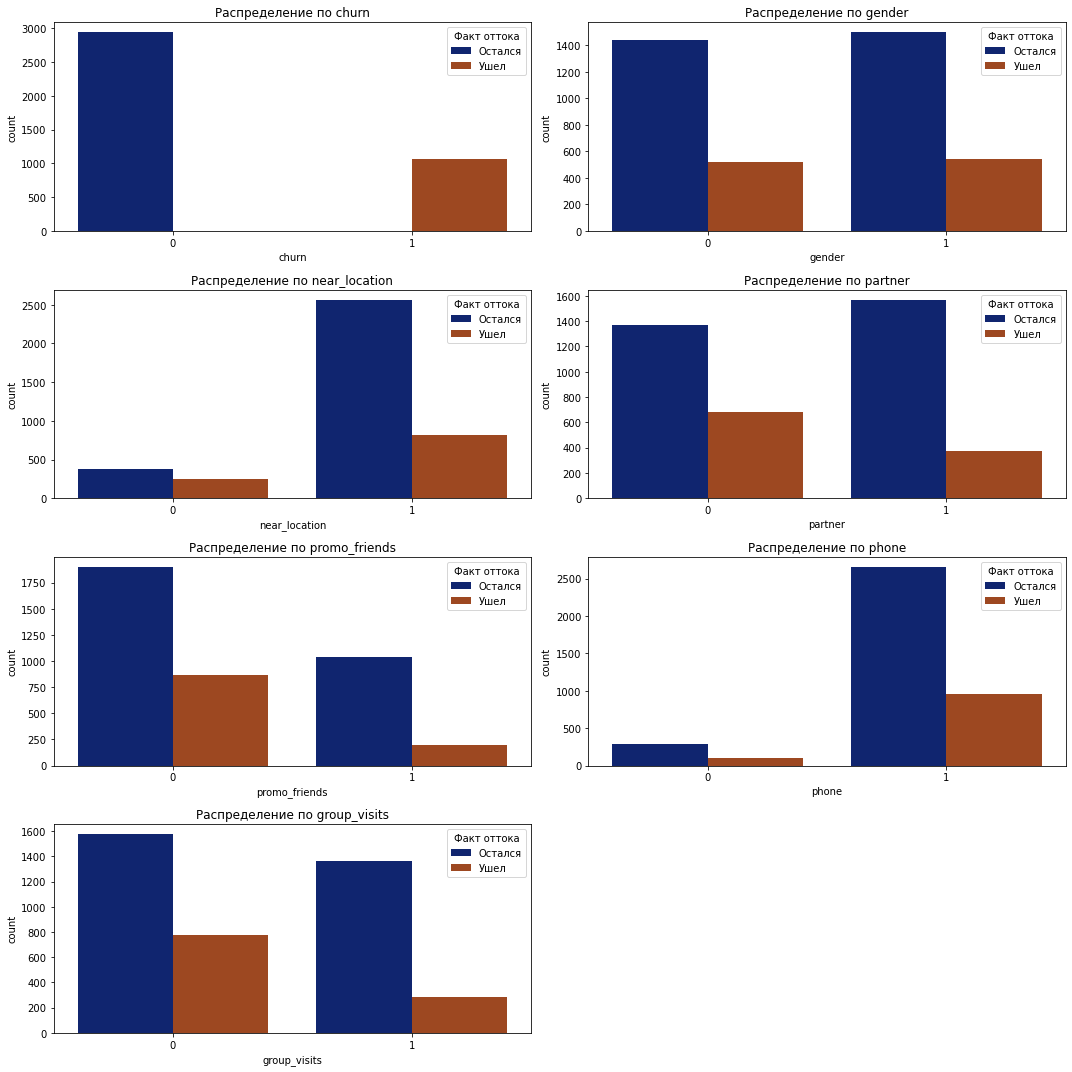

In [38]:
# строим графики распределения для столбцов с бинарными значениями

number_row = int(len(bi)/2)
fig, ax = plt.subplots(nrows = number_row + 1, ncols=2, figsize=(15, 15))
ax = ax.flatten()

# задаем цикл

for i in range(len(bi)):
    

    sns.countplot(data = data, x = bi[i], hue = 'churn', ax=ax[i]) 

    ax[i].set_title(f'Распределение по {bi[i]}')
    ax[i].legend(title = 'Факт оттока', labels = ['Остался', 'Ушел'])
    ax[i].set_xlabel(f'{bi[i]}')




# удалим последний пустой  
fig.delaxes(ax[-1])

            
# чтобы все надписи вошли   
fig.tight_layout()

plt.show()

Дополним выводы:
- оставшихся в 3 раза больше ушедших
- мужчины и женщины уходят и остаются примерно одинаково
- живущие/работающие рядом с клубом уходят реже
- промо-коды от знакомых работают хуже партнерской программы

#### Предварительные итоги из распределения признаков  данных

Целевая аудитория:
мужчины и женщины от 18 до 41 года

Перспективные клиенты:
- живущие/работающие возле спортклуба
- сотрудники компаний-партнеров

Продавать сопутствующие товары оправдано: клиенты покупают допуслуги охотно, остающиеся клиенты тратят бОльшие суммы

Выгоднее продавать "длинные" абонементы, такие клиенты уходят реже

Работать на удержание в первый месяц (средний лайфтайм уходящих 0.99) и за 2 месяца до конца купленного абонемента (у тех, кто ушел в среднем оставалось 1.6 месяца до окончания срока абонемента).


## Подготовка данных к машинному обучению

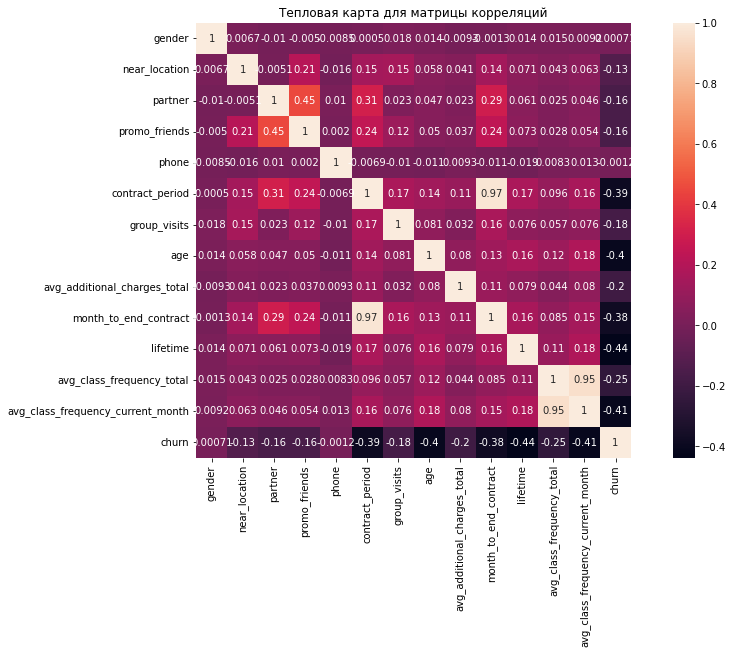

In [13]:
#построим и отрисуем матрицу корреляций
cm = data.corr() #вычисляем матрицу корреляций

f, ax = plt.subplots(figsize=(15,8 ))

#нарисуем тепловую карту с подписями для матрицы корреляций

sns.heatmap(cm, annot=True, square = True)

plt.title('Тепловая карта для матрицы корреляций')
plt.show()


В данных есть мультиколлинеарные признаки (зависящие друг от друга более чем на 0.8).
- month_to_end_contract // contract_period
- avg_class_frequency_current_month // avg_class_frequency_total

Для корректного продолжения работы (решаем проблему нерепрезентативных весов) избавимся от двух признаков (по одному из каждой пары)

In [14]:
# удаляем и проверяем (было 14 столбцов)
ml_data = data.drop('month_to_end_contract',axis = 1)
ml_data = ml_data.drop('avg_class_frequency_current_month', axis = 1)

len(ml_data.columns.tolist())

12

In [15]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = ml_data.drop('churn', axis = 1)
y = ml_data['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [17]:
# посмотрим сбалансированы ли классы целевой переменной
len(ml_data[ml_data['churn'] == 0]) / len(ml_data), len(ml_data[ml_data['churn'] == 1]) / len(ml_data), 

(0.73475, 0.26525)

### Итоги

Данные имеют достаточное количество наблюдений. Пропусков, дубликатов нет. Были выявлены сильно скоррелированные признаки (по одному из каждой пары удалили). Данные были разделены на признаки и целевую переменную (chern), разделены на обучающую и валидационную (тестовую) выборку, проведена стандартизация данных, с использованием класса StandardScaler. Модель готова к обучению. В интерпретации результатов метрики "доля правильных ответов" (accuracy)  стоит учитывать несбалансированность классов целевой переменной.

## Обучение

- Обучим модель на train-выборке двумя способами: логистической регрессией, случайным лесом.
- Оценим метрики: доля правильных ответов (accuracy), точность (precision) и полнота (recall) для обеих моделей на валидационной выборке.
- Сравним по ним модели. Выберем модель, показавшую лучший результат на основании метрик 

**Логистическая регрессия**

In [18]:
# определяем модель, обучаем ее, делаем предсказания
model = LogisticRegression(random_state = 0, solver='liblinear')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(
    'accuracy(классы не сбалансированы): {:.2f}, precision: {:.2f}, recall: {:.2f} '.format(
        accuracy_score(y_test, pred),
        precision_score (y_test, pred),
        recall_score (y_test, pred)
        )
)


accuracy(классы не сбалансированы): 0.88, precision: 0.76, recall: 0.77 


In [19]:
# определяем модель, обучаем ее, делаем предсказания, используя параметр class_weight='balanced'
model = LogisticRegression(random_state = 0, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(
    'accuracy(классы не сбалансированы): {:.2f}, precision: {:.2f}, recall: {:.2f} '.format(
        accuracy_score(y_test, pred),
        precision_score (y_test, pred),
        recall_score (y_test, pred)
        )
)


accuracy(классы не сбалансированы): 0.86, precision: 0.65, recall: 0.91 


**Случайный лес**

In [20]:
# определяем модель, обучаем ее, делаем предсказания
r_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
r_model.fit(X_train_st, y_train)
pred = r_model.predict(X_test_st)
print(
    'accuracy(классы не сбалансированы): {:.2f} precision: {:.2f} recall: {:.2f} '.format(
        accuracy_score(y_test, pred),
        precision_score (y_test, pred),
        recall_score (y_test, pred)
        )
)

accuracy(классы не сбалансированы): 0.89 precision: 0.79 recall: 0.76 


In [21]:
# определяем модель, обучаем ее, делаем предсказания, изменяя параметры
ra_model = RandomForestClassifier(random_state = 0, n_estimators = 200, max_features = 5)
ra_model.fit(X_train_st, y_train)
pred = ra_model.predict(X_test_st)
print(
    'accuracy(классы не сбалансированы): {:.2f} precision: {:.2f} recall: {:.2f} '.format(
        accuracy_score(y_test, pred),
        precision_score (y_test, pred),
        recall_score (y_test, pred)
        )
)

accuracy(классы не сбалансированы): 0.90 precision: 0.80 recall: 0.78 


#### Итоги

Лучшие показатели метрик у модели RandomForestClassifier, работая с дополнительными параметрами мы улучшили показатели метрик до 0.8 - показатель точности (максимум 1), 0.78 - показатель полноты (максимум 1).

Что касается метрики "доля правильных ответов" - она также улучшена до 0.9 (при том, что в наших данных нет баланса классов (ушедшие/оставшиеся).

## Кластеризация

- Стандартизируем данные.
- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.
- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.


In [22]:
# готовим данные для обучения без учителя
cluster_data = ml_data.drop('churn', axis=1)

In [23]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
sc = StandardScaler()
X_sc = scaler.fit_transform(cluster_data)    

In [24]:
# построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(X_sc, method='ward')

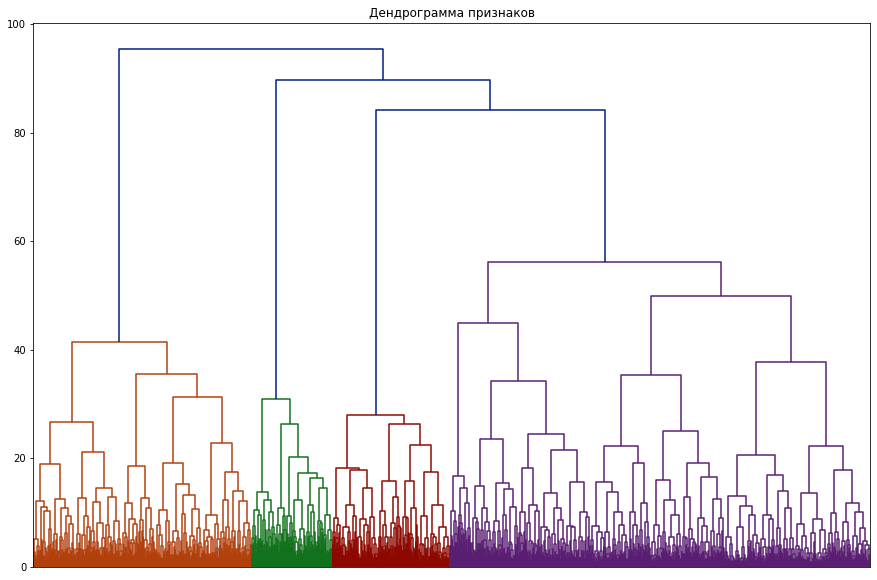

In [25]:
# отрисуем дендрограмму
plt.figure(figsize = (15,10))
dendrogram(linked, orientation = 'top')
plt.title('Дендрограмма признаков')
plt.xticks([])
plt.show()


Автоматически цветом на основании признаков было выделено 4 кластера, но мы все же разделим на два кластера самое большое фиолетовое "дерево". Далее группировать объекты будем по 5 кластерам.

In [26]:
# сгруппируем объекты в 5 кластеров
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_sc)
data['cluster'] = labels

In [27]:
# посмотрим на данные
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


- Посмотрим на средние значения признаков для кластеров.
- Построим распределение признаков для кластеров. 
- Посчитайте долю оттока для каждого кластера.

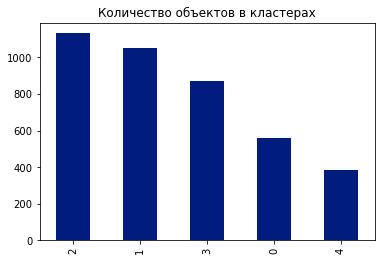

In [28]:
# количество объектов в кластерах после KMeans
data['cluster'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Количество объектов в кластерах')
plt.show()

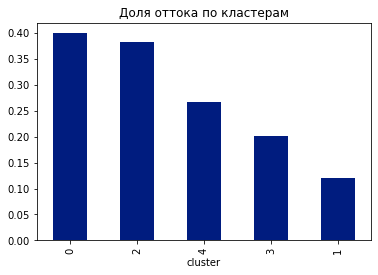

In [29]:
# посчитаем долю оттока для каждого кластера
data.groupby('cluster')['churn'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Доля оттока по кластерам')
plt.show()

**Самые многочисленные кластеры в нашей подборке - кластеры 1 и 2, меньше всего объектов в кластере 4**

**Реже всего уходят клиенты кластера 3, хуже всего удерживаются клиенты из кластера 4, кластера 1**


In [30]:
# средние значения признаков для каждого кластера
cluster_features = data.groupby('cluster').mean().reset_index()
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1)

,0,1,2,3,4
cluster,0.000000,1.000000,2.000000,3.000000,4.000000
gender,0.499109,0.488571,0.505300,0.544202,0.523316
near_location,0.000000,0.995238,1.000000,1.000000,0.862694
partner,0.488414,0.955238,0.238516,0.250287,0.471503
promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
age,28.721925,29.543810,28.770318,29.536165,29.297927
avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179


Посмотрим на визуализацию распределения признаков в кластерах. Также применим разные типы графиков для бинарных/небинарных признаков.

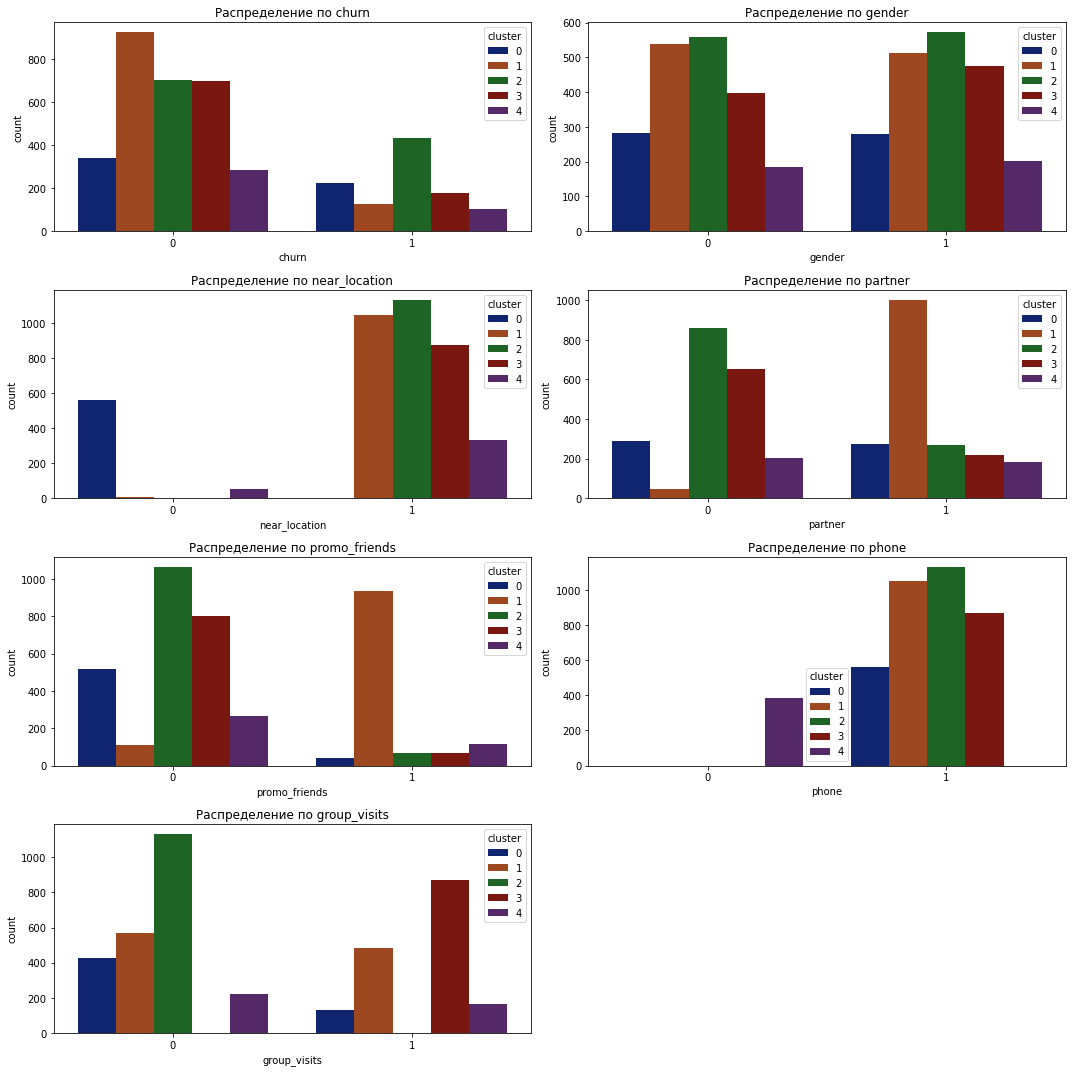

In [37]:
# строим распределения

number_row = int(len(bi)/2)
fig, ax = plt.subplots(nrows = number_row + 1, ncols=2, figsize=(15, 15))
ax = ax.flatten()

# задаем цикл

for i in range(len(bi)):
    

    sns.countplot(data = data, x = bi[i], hue = 'cluster', ax=ax[i]) 

    ax[i].set_title(f'Распределение по {bi[i]}')
    ax[i].set_xlabel(f'{bi[i]}')




# удалим последний пустой  
fig.delaxes(ax[-1])

            
# чтобы все надписи вошли   
fig.tight_layout()

plt.show()

- churn - отток - кластер 1 показывает лучшую разницу между оставшимися и ушедшими, в кластере 0 и кластере 2 стоит обратить внимание на удержание (разница между оставшимися и ушедшими небольшая, по сравнению с др.кластерами)
- gender - пол - распределение примерно 50\50 в каждом кластере.
- near_location - только клиенты в кластере 0 не живут/работают рядом
- partner, promo_friends - партнерская программа, промо-код друга - больше всего таких объектов в кластере 1, кластеры 2 и 3 - клиенты в основном не из партнерской программы/без промо-кода друга
- phone - оставили контакт - в кластере 4 никто не оставил свой номер телефона
- group_visits - групповые тренировки - кластер 2: не ходят на групповые занятия, кластер 3, наоборот, групповые занятия предпочитают

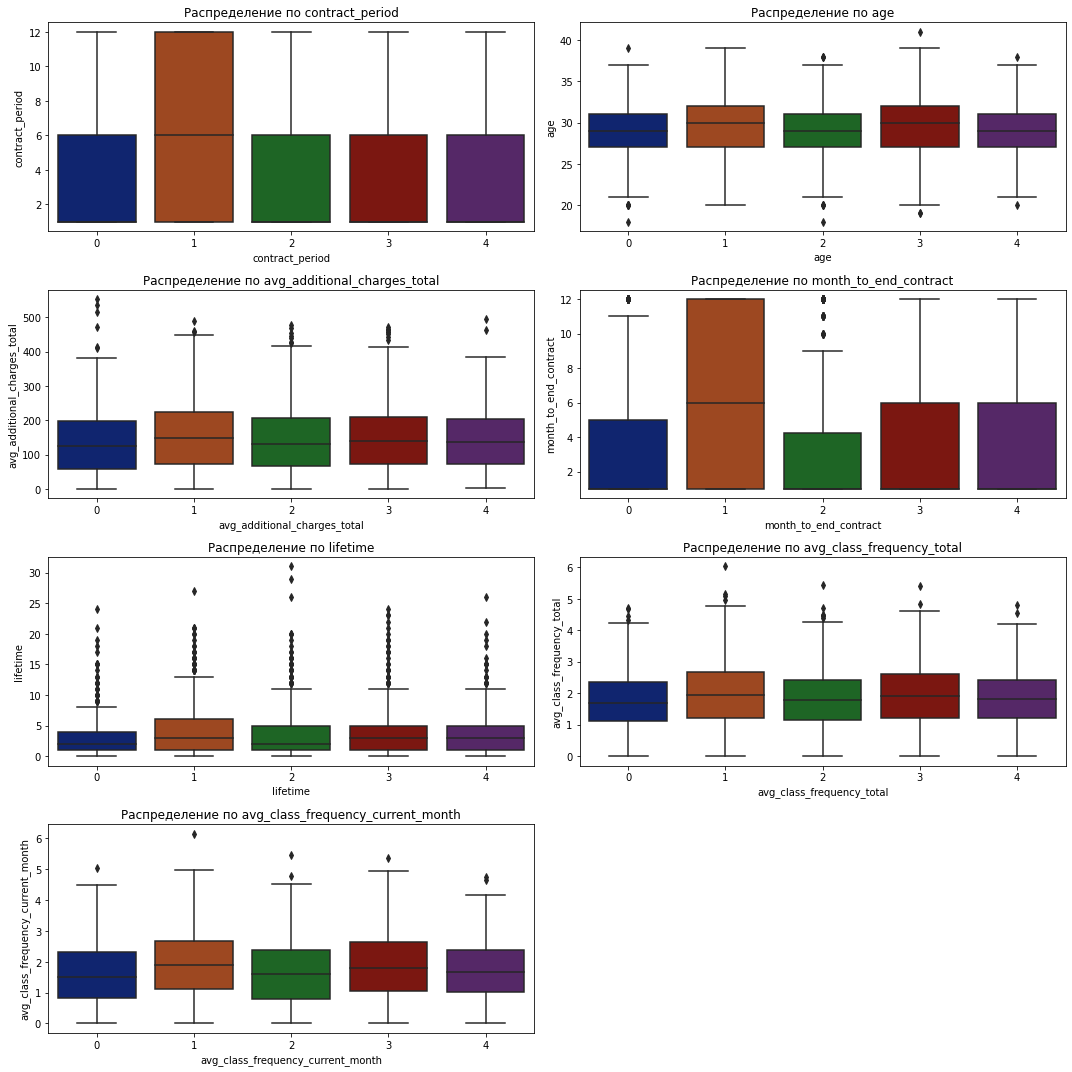

In [36]:
# строим распределения

number_row = int(len(multi)/2)
fig, ax = plt.subplots(nrows = number_row + 1, ncols=2, figsize=(15, 15))
ax = ax.flatten()

# задаем цикл

for i in range(len(multi)):
    

    sns.boxplot(data = data,x = 'cluster', y = multi[i], ax=ax[i]) 

    ax[i].set_title(f'Распределение по {multi[i]}')
    ax[i].set_xlabel(f'{multi[i]}')




# удалим последний пустой  
fig.delaxes(ax[-1])

            
# чтобы все надписи вошли   
fig.tight_layout()

plt.show()

- в кластере 1 самые длинные абонементы
- остальные признаки в кластерах примерно одинаковые

#### Итоги

В кластере 1 - много объектов, они хорошо удерживаются, в кластере 2, также много объектов, но доля оттока одна из самых высоких.

**Кластеризация дала нам портрет перспективной аудитории - это кластер 1 - и показала ее основные характеристики.**
Женщины и мужчины около 30 лет, живущие/работающие рядом, пришедшие от предприятий-партнеров или по промо-коду друга, оставляющие номер телефона, покупающие достаточно длинные абонементы (среднее contract_period	- 7.66 месяца). На допуслуги они тратят больше других, лайфтайм тоже длиннее - 4 месяца, ходят чаще всех в месяц/в неделю.

**Так как клиентов во 2 кластере также много, опишем его отличия от 1 кластера.** Объекты этого кластера меньше всего приходили в фитнесс-центр по программе партнеров и промо-коду друга, они не ходят на групповые занятия и берут самые "короткие" абонементы.

**кластер 0** - самая большая доля оттока, практически все признаки показывают худшие значения. Клиенты - мужчины и женщины, 28 лет, не живущие/работающие рядом, часть из них пришли по партнерской программе, практически никто по промо-коду друга. Но здесь есть плюс, эти клиенты все оставили свой номер телефона.

**кластер 3** - невысокая доля оттока, среди кластеров. Эти клиенты в среднем 29,5 лет живут/работают рядом, но пришли в большинстве случаев не по партнерской программе и не по промо-коду. Они ходят на групповые программы, покупают средние по длительности абонементы и остаются в фитнесс-центре на почти 4 месяца

**кластер 4** - средняя доля оттока, клиенты 29 лет, живут рядом, покупают абонементы средние по длительности при этом остаются в клубе достаточно долго (показатель лайфтайм второй среди кластеров). Большой недостаток этого кластера - они не оставляют номер телефона, соответственно вернуть их назад будет сложнее

## Общие выводы и рекомендации

**Данные для анализа были собраны из анкет клиентов и данных по абонементам, включали в себя информацию на месяц до оттока и факт оттока на определенный месяц. Для предсказания оттока клиентов были выбраны две модели - логистическая регрессия и случайный лес(RandomForestClassifier). Оценены метрики - доля правильных ответов, полнота и точность. Метрики модели случайный лес(RandomForestClassifier)  показали лучшие результаты. Кроме того для кластеризации клиентов была отрисована дендрограмма, по которой было принято решение разделить базу на 5 кластеров. Кластеры были описаны, выбран наиболее надежный из них - кластер 1.**

Для лучшего привлечения и удержания клиентов рекомендуем:
- своевременно вносить данные о новых клиентах в базу, определять клиентов в кластеры, получать ответ на вопрос - останется клиент или нет? - используя ML, для того, чтобы предупреждать отток, а не возвращать клиентов
- pаботать на удержание в первый месяц (средний лайфтайм уходящих 0.99) и за 2 месяца до конца купленного абонемента (у тех, кто ушел в среднем оставалось 1.6 месяца до окончания срока абонемента).
- наращивать клиентскую базу из близлежащих домов, близких районов
- усиливать партнерскую программу
- развивать линейку сопутствующих товаров и услуг
- продолжать продавать более длинные абонементы